<a href="https://colab.research.google.com/github/saahilahujaa/Ted-Talk-Prediction/blob/main/Ted_Talk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TED TALKS Views Prediction**
****
TED is devoted to spreading powerful ideas on just about any topic. Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.

##**Objective**
****
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

##**Importing Neccessary Libraries**

In [ ]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor.
from xgboost import XGBRegressor

# Import metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


##**Data Gathering and Discovery**
***

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path = "/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Capstone Project 2 - Ted Talk Views Prediction/"

# Importing TED Talks Data File.
Ted_talks = pd.read_csv(Data_path + "data_ted_talks.csv")

In [ ]:
Ted_talks.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
Ted_talks.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [ ]:
Ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
Ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

##**EDA on TED Talks Dataset**
***
Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. it’s a scientific approach to get the **story of the data**.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed. Also we'd deal with outliers in this section. However, in this project we've made a seperate section of feature engineering for variable transformations. 

Note:- For visualizations in EDA section we have used Tableau to create interactive and appealing charts rather than just some graphical representation of facts and data. 

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1655992236730' style='position: relative'><noscript><a href='#'>
<img alt='Speakers and their respective Sum of views, duration and comments. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA9&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA9&#47;Sheet1' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA9&#47;Sheet1&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1655992236730');                 
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='90%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1656149142149' style='position: relative'>
<noscript><a href='#'><img alt='Top 20 Speakers with Highest sum of views. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA8&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> <param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA8&#47;Sheet2' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA8&#47;Sheet2&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
</object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1656149142149');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='90%';vizElement.style.height='500px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1656149405447' style='position: relative'>
<noscript><a href='#'><img alt='Speakers and their respective Average of views, duration and comments. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA5&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA5&#47;Sheet4' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA5&#47;Sheet4&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1656149405447');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='90%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1656149872863' style='position: relative'>
<noscript><a href='#'><img alt='Top 20 Speakers with Highest Average of views. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA7&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA7&#47;Sheet3' />
<param name='tabs' value='no' /><param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA7&#47;Sheet3&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1656149872863');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='90%';vizElement.style.height='500px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1656150055960' style='position: relative'><noscript><a href='#'><img alt='Average Views per Published Year  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA6&#47;Sheet5&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA6&#47;Sheet5' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA6&#47;Sheet5&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1656150055960');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='80%';vizElement.style.height='600px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1656150365689' style='position: relative'>
<noscript><a href='#'><img alt='Views Vs Duration ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA4&#47;Sheet6&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA4&#47;Sheet6' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA4&#47;Sheet6&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1656150365689');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='90%';vizElement.style.height='500px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1656150669376' style='position: relative'>
<noscript><a href='#'><img alt='Views Vs Comments ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA2&#47;Sheet8&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA2&#47;Sheet8' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA2&#47;Sheet8&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
</object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1656150669376');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='90%';vizElement.style.height='500px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1656150880986' style='position: relative'>
<noscript><a href='#'><img alt='Average Views for different Events.  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA&#47;Sheet9&#47;1_rss.png' style='border: none' /></a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='Ted_talks_EDA&#47;Sheet9' />
<param name='tabs' value='no' /><param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA&#47;Sheet9&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
<param name='language' value='en-US' />
</object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1656150880986');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='90%';vizElement.style.height='400px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

**Views** :-

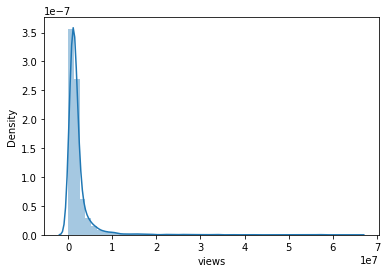

In [ ]:
sns.distplot(Ted_talks["views"])

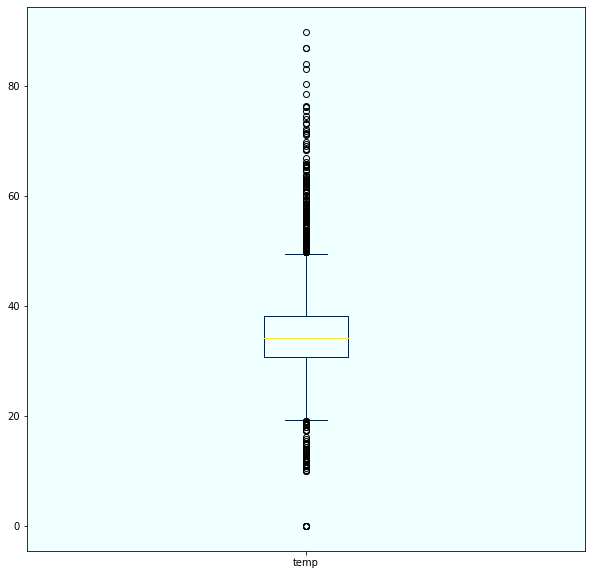

In [ ]:
# Making a temporary column with Fourth root of 'views' column such that we can visualize it using a box plot.
Ted_talks["temp"] = np.power(Ted_talks["views"], 1/4)

# Plotting the Box plot on "temp" column.
Ted_talks.plot(y = "temp", kind = "box", figsize = (10,10), colormap = "cividis").patch.set_facecolor('#f0ffff')

# Dropping the 'temp' column since its irrelevant 
Ted_talks.drop(axis = 1, labels = ["temp"], inplace = True)

In [ ]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

In [ ]:
Ted_talks["all_speakers"].fillna(value = str({0:""}), axis = 0, inplace=True)

Dropping Rows with 0 Views

In [ ]:
li = Ted_talks[Ted_talks["comments"]>1000].index
Ted_talks.drop(labels = li, axis = 0, inplace = True)

In [ ]:
Ted_talks["comments"].fillna(Ted_talks["comments"].median(), axis = 0, inplace = True)

In [ ]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

##**Feature Engineering**
***

In [ ]:
Ted_talks.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


In [ ]:
from datetime import datetime
import datetime as dt
Ted_talks['published_date'] = Ted_talks['published_date'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))

Ted_talks['year'] = Ted_talks['published_date'].dt.year
Ted_talks['month'] = Ted_talks['published_date'].dt.month
Ted_talks['day'] = Ted_talks["published_date"].dt.day_name()

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
Ted_talks['daynum'] = Ted_talks['day'].map(daydict)

Ted_talks['weekdays_weekend']=Ted_talks['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Ted_talks=Ted_talks.drop(columns=['published_date', "daynum", "weekdays_weekend"],axis=1)

In [ ]:
Ted_talks["year_recency"] = 2021 - Ted_talks["year"]
Ted_talks["per_annum_views"] = Ted_talks["views"]//Ted_talks["year_recency"]

In [ ]:
Ted_talks["available_lang_count"] = Ted_talks["available_lang"].apply(lambda x: len(eval(x)))

In [ ]:
Ted_talks["topics_covered"] = Ted_talks["topics"].apply(lambda x: len(eval(x)))

In [ ]:
d = {}
for row in Ted_talks.index:
    list_of_topics = Ted_talks["topics"][row]
    list_of_topics = list_of_topics.strip('][').split(', ')
    
    for topic in list_of_topics:
        topic = topic[1:len(topic)-1]
        d[topic] = d.get(topic, 0) + 1

In [ ]:
def weight_of_topic(x):
    x = eval(x)
    for i in range(len(x)):
        x[i] = d[str(x[i])]
    weight = sum(x)
    return weight

Ted_talks["topics_weight"] = Ted_talks["topics"].apply(lambda x: weight_of_topic(x))
    

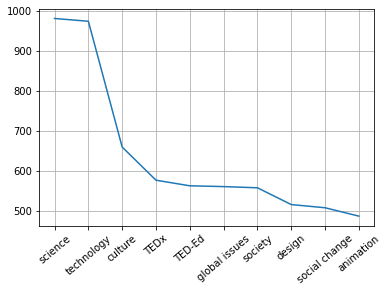

In [ ]:

from operator import itemgetter
  
ddd = dict(sorted(d.items(), key = itemgetter(1), reverse = True)[:10])

myList = ddd.items()
# myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.xticks(rotation = 40)
plt.grid()
plt.show()

In [ ]:
Ted_talks['words_count_descp'] = Ted_talks['description'].str.split().apply(len)

In [ ]:
Ted_talks["related_views"] = 0
for row in Ted_talks.index:
    rel_talks = eval(Ted_talks["related_talks"][row])
    sum_views = 0
    for talk_id in rel_talks:
        view_vid = Ted_talks[Ted_talks["talk_id"] == talk_id]
        view_vid.reset_index(inplace=True)
        try:
            view_count = view_vid["views"][0]
            sum_views = sum_views + view_count
        except:
            sum_views = sum_views + 0
    sum_views = sum_views//len(rel_talks)
    Ted_talks["related_views"][row] = sum_views

In [ ]:
Ted_talks.drop(axis = 1, labels = ["talk_id", "all_speakers", "title", "occupations", 
                                    "recorded_date", "about_speakers", 
                                   "related_talks", "url", 
                                   "transcript", "speaker_1", "event",  "available_lang",
                                  "topics", "description", "day", "month", "year", "native_lang"], inplace = True)

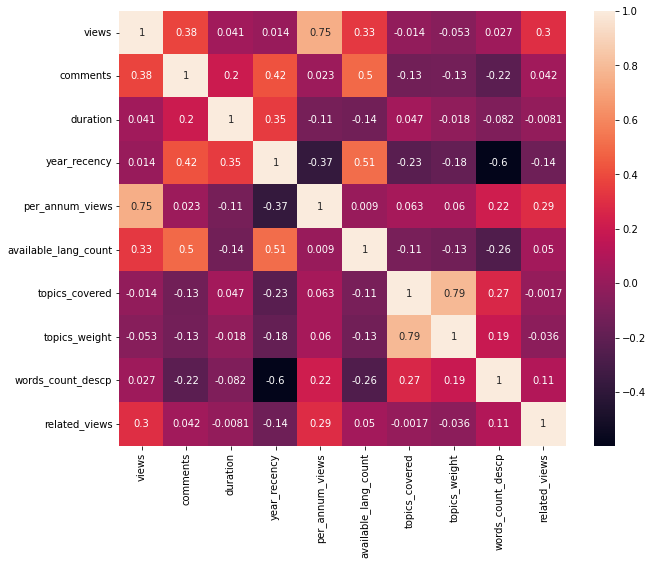

In [ ]:
correlmap = Ted_talks.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

In [ ]:
dependent_variable = 'views'

In [ ]:
independent_variables = list(set(Ted_talks.columns.tolist()) - {"views"})

In [ ]:
independent_variables

['comments',
 'duration',
 'topics_weight',
 'year_recency',
 'topics_covered',
 'words_count_descp',
 'per_annum_views',
 'related_views',
 'available_lang_count']

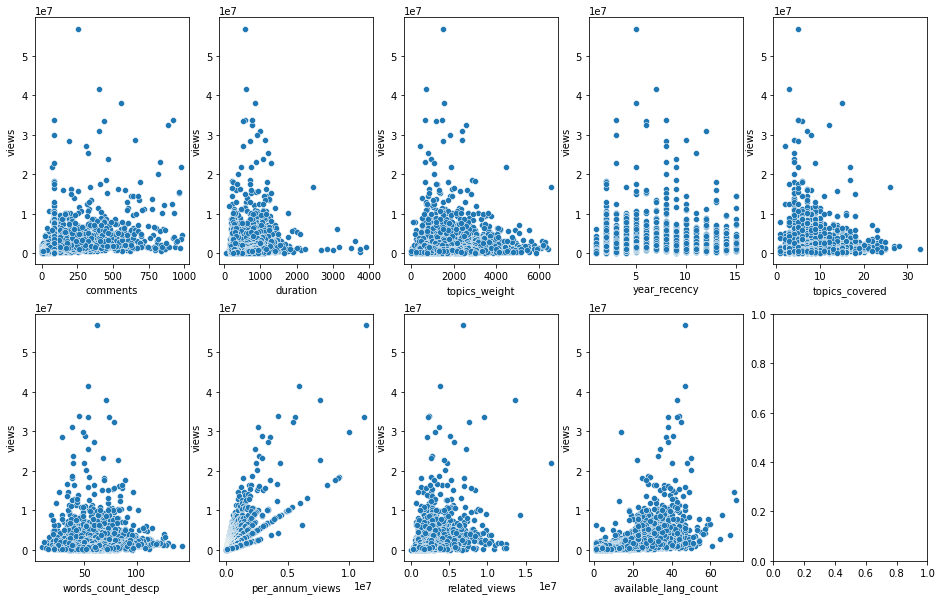

In [ ]:
variable_df = Ted_talks[independent_variables]
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize= (16,10))
for i, col in enumerate(variable_df.columns):
  sns.scatterplot(data=Ted_talks, x=col, y="views", ax = axes[i//5, i%5])

# Splitting the Dataframe into train and test sets.

In [ ]:
# lets have a look at the data before going futther with splitting.
Ted_talks

,views,comments,duration,year_recency,per_annum_views,available_lang_count,topics_covered,topics_weight,words_count_descp,related_views
0,3523392,272.0,977,15,234892,43,9,3796,39,1659584
1,14501685,628.0,1190,15,966779,49,11,1840,26,1573950
2,1920832,124.0,1286,15,128055,26,9,1993,31,3051136
3,2664069,219.0,1116,15,177604,35,9,1611,31,1053294
5,1208138,48.0,1198,15,80542,19,5,1558,32,1798983
...,...,...,...,...,...,...,...,...,...,...
3999,760969,37.0,941,1,760969,4,8,1930,81,1052880
4000,502934,6.0,690,1,502934,1,7,2173,97,3834844
4001,307187,88.0,346,1,307187,4,8,2356,77,2355543
4002,464414,9.0,774,1,464414,1,5,1325,75,1433374


In [ ]:
# independent variables
X = Ted_talks[list(Ted_talks.columns)[1:]]

# dependent variable
y = Ted_talks["views"]


In [ ]:
# display independent variables dataframe
X

,comments,duration,year_recency,per_annum_views,available_lang_count,topics_covered,topics_weight,words_count_descp,related_views
0,272.0,977,15,234892,43,9,3796,39,1659584
1,628.0,1190,15,966779,49,11,1840,26,1573950
2,124.0,1286,15,128055,26,9,1993,31,3051136
3,219.0,1116,15,177604,35,9,1611,31,1053294
5,48.0,1198,15,80542,19,5,1558,32,1798983
...,...,...,...,...,...,...,...,...,...
3999,37.0,941,1,760969,4,8,1930,81,1052880
4000,6.0,690,1,502934,1,7,2173,97,3834844
4001,88.0,346,1,307187,4,8,2356,77,2355543
4002,9.0,774,1,464414,1,5,1325,75,1433374


In [ ]:
# display dependent variable dataframe
y

0        3523392
1       14501685
2        1920832
3        2664069
5        1208138
          ...   
3999      760969
4000      502934
4001      307187
4002      464414
4003       56582
Name: views, Length: 3957, dtype: int64

In [ ]:
# calling train_test_split() to get the training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(2967, 9)
(990, 9)


# Linear Regression

In [ ]:
# building the model and fitting training data
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# checking the score
reg.score(X_train, y_train)

0.7588497561383465

In [ ]:
# check the coefficeints
reg.coef_

array([ 4.06149907e+03,  4.88547563e+02,  9.34411224e+04,  2.85182927e+00,
        5.25548117e+04,  5.28819050e+04, -2.50221912e+02,  4.92043566e+03,
        1.24219743e-01])

In [ ]:
# predict for train data
y_pred_train=reg.predict(X_train)

# predict for test data
y_pred_test=reg.predict(X_test)

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


# calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_lr )

MSE : 1931126854774.7505
RMSE : 1389649.9036716947
MAE : 738032.7332567484
R2 : 0.7588497561383465
Adjusted R2 : 0.7566351110416578


In [ ]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# calculating MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

# calculating RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# calculating MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


# calculating r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 2881025934861.542
RMSE : 1697358.5168907428
MAE : 780216.0162235339
R2 : 0.6788168223768791
Adjusted R2 : 0.6758671809497281


In [ ]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

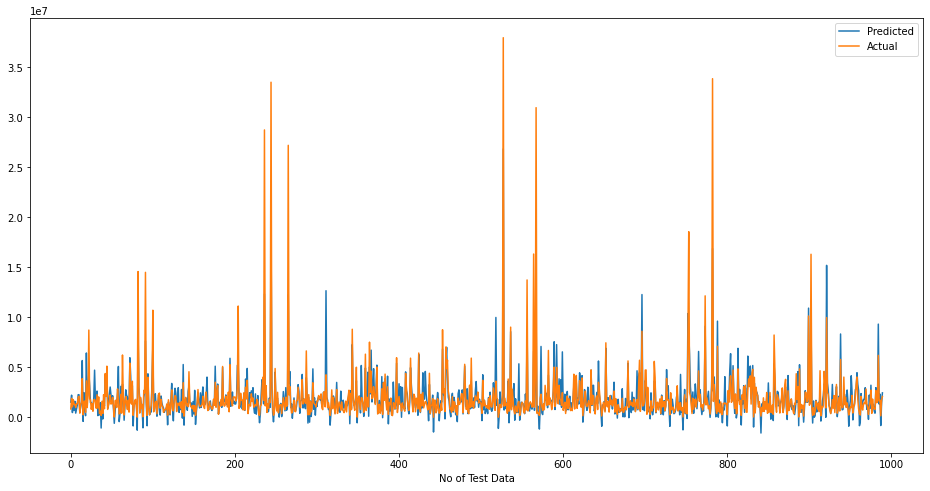

In [ ]:
# Plot the figure
plt.figure(figsize=(16,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# Lasso Regression

In [ ]:
# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6788168171595075 0.7588497561382949


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 1931126854775.164
RMSE : 1389649.9036718435
MAE : 738032.6377552969
R2 : 0.7588497561382949
Adjusted R2 : 0.7566351110416057


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [ ]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,738032.733,1.931127e+12,1389649.904,0.759,0.76
1,Lasso regression,738032.638,1.931127e+12,1389649.904,0.759,0.76


In [ ]:
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2881025981661.5737
RMSE : 1697358.530676879
MAE : 780215.905183278
R2 : 0.6788168171595075
Adjusted R2 : 0.6758671756844417


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,780216.016,2.881026e+12,1697358.517,0.679,0.68
1,Lasso regression,780215.905,2.881026e+12,1697358.531,0.679,0.68


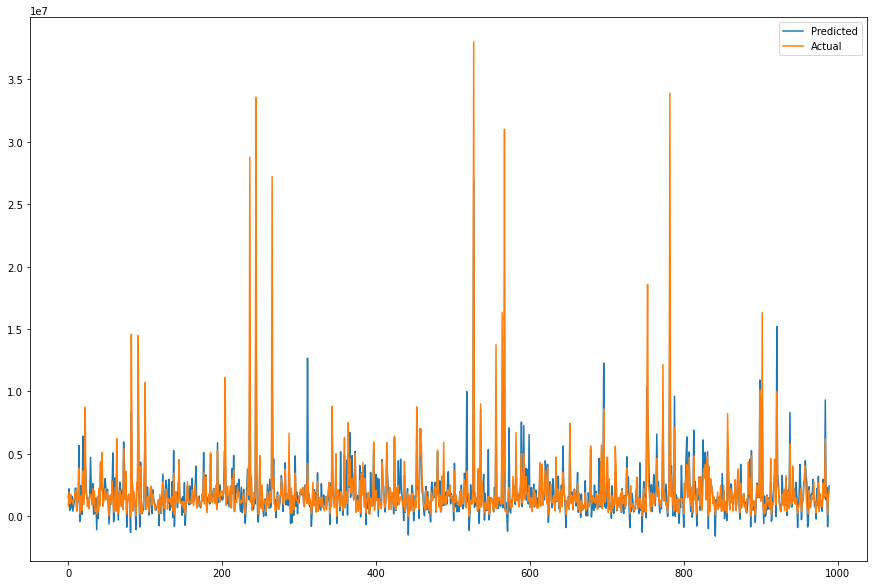

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Ridge Regression


In [ ]:
ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7588497561380212

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1931126854777.356
RMSE : 1389649.9036726323
MAE : 738032.4821862652
R2 : 0.7588497561380212
Adjusted R2 : 0.7566351110413295


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2881026127445.886
RMSE : 1697358.5736213448
MAE : 780215.7395014238
R2 : 0.6788168009071481
Adjusted R2 : 0.675867159282826


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

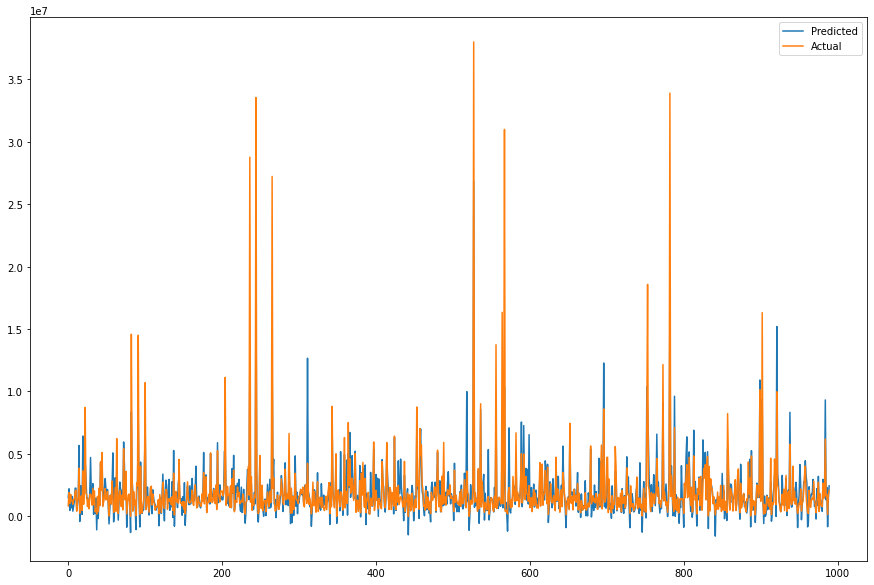

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

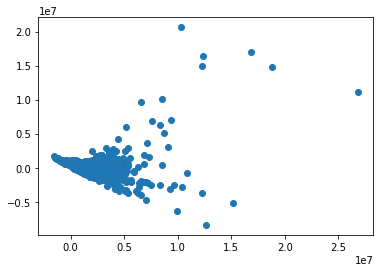

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# Elastic Net Regression

In [ ]:
# creating a model object.
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# check the score
elasticnet.score(X_train, y_train)

0.7588490564874713

In [ ]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 1931132457566.4895
RMSE : 1389651.919570685
MAE : 737664.4719429845
R2 : 0.7588490564874713
Adjusted R2 : 0.7566344049654175


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculating RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


# calculating MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


# calculating r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)

Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_e)

MSE : 2881313979224.452
RMSE : 1697443.3655425597
MAE : 779811.2141152808
R2 : 0.6787847105507909
Adjusted R2 : 0.6758347742191145


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

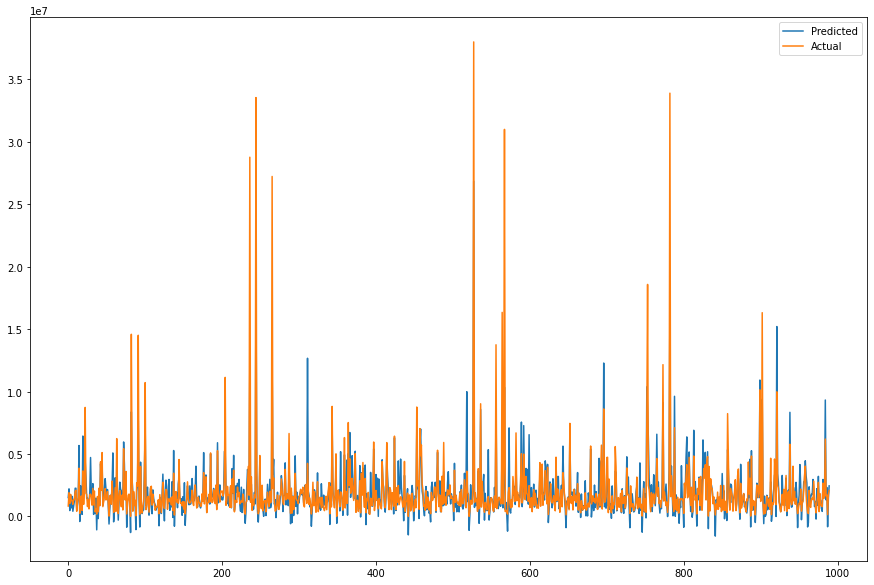

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# display test evaluation dataframe
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,780216.016,2.881026e+12,1697358.517,0.679,0.68
1,Lasso regression,780215.905,2.881026e+12,1697358.531,0.679,0.68
2,Ridge regression,780215.740,2.881026e+12,1697358.574,0.679,0.68
3,Elastic net regression Test,779811.214,2.881314e+12,1697443.366,0.679,0.68


# Decision Tree

In [ ]:
# building the model
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100)
# fitting training data to the model
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
# predict for train data
y_pred_train_d = decision_regressor.predict(X_train)

# predict for test data
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
# calculating model score
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# calculating r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


Model Score: 0.9919857577557426
MSE : 64177909052.559235
RMSE : 253333.59242816424
MAE : 183196.833203842
R2 : 0.9919857577557426
Adjusted R2 : 0.9919121575718668


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:

# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


# calculating r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d)


MSE : 705231310210.1635
RMSE : 839780.5131164711
MAE : 276507.8349213
R2 : 0.9213792453473686
Adjusted R2 : 0.920657218008722


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# display train evaluation dataframe.
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,738032.733,1.931127e+12,1389649.904,0.759,0.76
1,Lasso regression,738032.638,1.931127e+12,1389649.904,0.759,0.76
2,Ridge regression,738032.482,1.931127e+12,1389649.904,0.759,0.76
3,Elastic net regression,737664.472,1.931132e+12,1389651.920,0.759,0.76
4,Decision tree regression,183196.833,6.417791e+10,253333.592,0.992,0.99


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,780216.016,2.881026e+12,1697358.517,0.679,0.68
1,Lasso regression,780215.905,2.881026e+12,1697358.531,0.679,0.68
2,Ridge regression,780215.740,2.881026e+12,1697358.574,0.679,0.68
3,Elastic net regression Test,779811.214,2.881314e+12,1697443.366,0.679,0.68
4,Decision tree regression,276507.835,7.052313e+11,839780.513,0.921,0.92


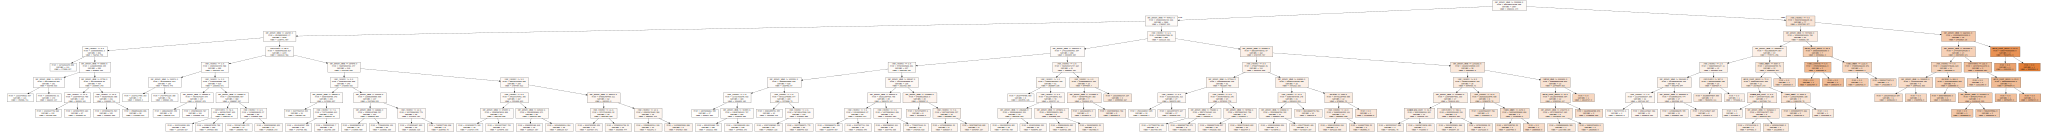

In [ ]:

# DOT data
dot_data = tree.export_graphviz(decision_regressor, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names='views',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render

# Display graph
graph

# Random Forest

In [ ]:
# Create an instance of the RandomForestRegressor.
rf_model = RandomForestRegressor()

# fitting the train data in model.
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# predict for train data.
y_pred_train_r = rf_model.predict(X_train)

# predict for test data.
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
# calculating model score.
print("Model Score:",rf_model.score(X_train,y_train))

# calculating MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


# calculating r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf )


Model Score: 0.9891298396085507
MSE : 87048050673.66751
RMSE : 295039.06635167403
MAE : 39073.58877317155
R2 : 0.9891298396085507
Adjusted R2 : 0.9890300116049557


In [ ]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

# Calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


MSE : 408281361631.9592
RMSE : 638968.9833097998
MAE : 103208.72453535353
R2 : 0.9544838859287987
Adjusted R2 : 0.9540658807995734


In [ ]:
# storing the test set metrics value in the test evaluation dataframe.
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# feature importances for random forest model
rf_model.feature_importances_

array([0.0425919 , 0.00733774, 0.23956834, 0.64134434, 0.04041444,
       0.00371831, 0.01224232, 0.00963035, 0.00315227])

In [ ]:
# storing feature importances in a dataframe.
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
3,per_annum_views,0.64
2,year_recency,0.24
0,comments,0.04
4,available_lang_count,0.04
1,duration,0.01
6,topics_weight,0.01
7,words_count_descp,0.01
5,topics_covered,0.00
8,related_views,0.00


In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,780216.016,2.881026e+12,1697358.517,0.679,0.68
1,Lasso regression,780215.905,2.881026e+12,1697358.531,0.679,0.68
2,Ridge regression,780215.740,2.881026e+12,1697358.574,0.679,0.68
3,Elastic net regression Test,779811.214,2.881314e+12,1697443.366,0.679,0.68
4,Decision tree regression,276507.835,7.052313e+11,839780.513,0.921,0.92
5,Random forest regression,103208.725,4.082814e+11,638968.983,0.954,0.95


# XGB Regression

In [ ]:
# making a model object of XGB regressor.
model = XGBRegressor(n_estimators=11, max_depth=8)

# fitting train data in XGB model. 
model.fit(X_train, y_train)

[12:28:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=8, n_estimators=11)

In [ ]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [ ]:
# calculating model score on train data.
print("Model Score:",model.score(X_train,y_train))

# calculating MSE
MSE_d= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_d)

# calculating r2
r2_d= r2_score(y_train, y_pred_train_xgb)
print("R2 :",r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )


Model Score: 0.7783293862276168
MSE : 1775134324209.2444
RMSE : 1332341.6694711775
MAE : 678371.7278807113
R2 : 0.7783293862276168
Adjusted R2 : 0.7762936356929725


In [ ]:
# storing the train matrics in the train evaluation dataframe
dict1={'Model':'XGBoost Regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_d= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_d)

# calculating RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


# calculating MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_d)

# calculating r2
r2_d= r2_score((y_test), (y_pred_test_xgb))
print("R2 :",r2_d)

# calculating adjusted r2
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_d )

MSE : 2309057229890.952
RMSE : 1519558.23511011
MAE : 676097.5916331281
R2 : 0.7425811654674817
Adjusted R2 : 0.7402171149462646


In [ ]:
# storing the test matrics in the test evaluation dataframe
dict2={'Model':'XGBoost regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# display test evaluation dataframe.
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,780216.016,2.881026e+12,1697358.517,0.679,0.68
1,Lasso regression,780215.905,2.881026e+12,1697358.531,0.679,0.68
2,Ridge regression,780215.740,2.881026e+12,1697358.574,0.679,0.68
3,Elastic net regression Test,779811.214,2.881314e+12,1697443.366,0.679,0.68
4,Decision tree regression,276507.835,7.052313e+11,839780.513,0.921,0.92
5,Random forest regression,103208.725,4.082814e+11,638968.983,0.954,0.95
6,XGBoost regression,676097.592,2.309057e+12,1519558.235,0.743,0.74


# Random Forest with Grid Search CV

In [ ]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters 
# and their values the grid search algorithm will apply and get the 
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {
'n_estimators': [200, 500],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8,9,10],

}
param_grid_cv

{'max_depth': [4, 5, 6, 7, 8, 9, 10],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [200, 500]}

In [ ]:
# Running the GridSearchCV algorithm on above parameter dictionary 
# with estimator as rf_model(random forest model) to get the 
# best combination of parameters for random forest algorithm.
CV_rfc = GridSearchCV(estimator = rf_model, param_grid = param_grid_cv, cv= 5)

# Fitting the training data into the model.
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [ ]:
# calculating model score on train data
print("Model Score:",CV_rfc.score(X_train,y_train))

# calculating MSE
MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf )


Model Score: 0.9906301142989378
MSE : 75033877692.74591
RMSE : 273923.12369120267
MAE : 73712.09838921946
R2 : 0.9906301142989378
Adjusted R2 : 0.9905440643282137


In [ ]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression with gridSearchCV ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

# adding the values to the train evaluation dataframe.
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# calculating MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
print("MSE :",MSE_rf)

# calculating RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


# calculating MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
print("MAE :",MAE_rf)


# calculating r2
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
print("R2 :",r2_rf)

# calculating adjusted r2
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_rf)

MSE : 423592686840.3715
RMSE : 650839.9855881409
MAE : 133687.41916337557
R2 : 0.9527769453474758
Adjusted R2 : 0.9523432642333199


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Random forest regression with gridSearchCV',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# feature importances for grid CV random forest model.
rf_model.feature_importances_

array([0.0425919 , 0.00733774, 0.23956834, 0.64134434, 0.04041444,
       0.00371831, 0.01224232, 0.00963035, 0.00315227])

In [ ]:
# storing feature importances in a dataframe
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
# rounding off the values.
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
# sort features according to their importance.
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
3,per_annum_views,0.64
2,year_recency,0.24
0,comments,0.04
4,available_lang_count,0.04
1,duration,0.01
6,topics_weight,0.01
7,words_count_descp,0.01
5,topics_covered,0.00
8,related_views,0.00


In [ ]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,780216.016,2.881026e+12,1697358.517,0.679,0.68
1,Lasso regression,780215.905,2.881026e+12,1697358.531,0.679,0.68
2,Ridge regression,780215.740,2.881026e+12,1697358.574,0.679,0.68
3,Elastic net regression Test,779811.214,2.881314e+12,1697443.366,0.679,0.68
4,Decision tree regression,276507.835,7.052313e+11,839780.513,0.921,0.92
5,Random forest regression,103208.725,4.082814e+11,638968.983,0.954,0.95
6,XGBoost regression,676097.592,2.309057e+12,1519558.235,0.743,0.74
7,Random forest regression with gridSearchCV,133687.419,4.235927e+11,650839.986,0.953,0.95
